In [1]:
library(Seurat)
library(ComplexHeatmap)
library(circlize)
library(dplyr)
library(tibble)
library(viridis)
source("./heatmap.fun.R")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘dplyr’


The following objec

In [2]:
## Data for visualization
seu <- readRDS(file = paste0("./load_files/ExN.harmony.spread_region.v1.harmony.rds"))
nseu <- seu[, seu@meta.data$cbnage %in% c("E93", "E110") & seu@meta.data$subtype %in% c("ExN up ACTN2")]
nseu@meta.data$avg_cls <- paste0(nseu@meta.data$region, "|", nseu@meta.data$subtype)
kp_cls <- table(nseu@meta.data$avg_cls) %>% .[. >= 15] %>% names()
seu_use <- subset(nseu, avg_cls %in% kp_cls)
rm(seu, nseu)

In [3]:
marAvgFile <- "./Horizontal_gradient_upper_avg_markers.Rdata"
if (!file.exists(marAvgFile)){
    ## average expression
    Idents(seu_use) <- "avg_cls"
    avgs <- log(AverageExpression(seu_use)$RNA + 1)

    ## find region-specific genes
    Idents(seu_use) <- "region"
    mar_res <- FindAllMarkers(seu_use, max.cells.per.ident = 500, logfc.threshold = 0.3, only.pos = TRUE) %>%
                mutate(ratio_fc = (pct.1 + 0.01)/(pct.2 + 0.01))
    mars <- mar_res %>%
                filter(ratio_fc >= 1.25 & pct.1 >= 0.15 & p_val_adj <= 0.01) %>%
                .$gene %>% unique()
    save(avgs, mars, file = marAvgFile)
}
load(file = marAvgFile)
summary(mars)
mars

   Length     Class      Mode 
      544 character character 

[1] "VSTM2L"       "PCDH17"       "CAV1"         "CBLN2"        "FGF7"        
  [6] "PENK"         "FABP3"        "GRID2"        "GNG4"         "CNTN1"       
 [11] "NECAB1"       "RPRM"         "VSTM2B"       "EPHB6"        "NFIA"        
 [16] "CALY"         "SSTR2"        "CACNA1A"      "NEUROD1"      "APP"         
 [21] "SRM"          "HMGCS1"       "CPNE8"        "SCG2"         "MASP1"       
 [26] "SPOCK1"       "LOC707695"    "STMN3"        "GRM5"         "SLN"         
 [31] "ATP8A2"       "ZNF827"       "ATP1A3"       "UBE2E3"       "PRSS23"      
 [36] "SLA"          "ACAT2"        "GRIN2A"       "HMGCR"        "MYO16"       
 [41] "C11H12orf75"  "FASN"         "RAC3"         "PLXNA1"       "RASSF2"      
 [46] "KLF6"         "MCUB"         "MSMO1"        "BIN1"         "PTCHD4"      
 [51] "CDK5R2"       "CNIH2"        "PLPPR3"       "DIRAS2"       "NSMF"        
 [56] "GDF1"         "CCDC184"      "FLRT2"        "CXXC4"        "CDKN2D"      
 [61] "FAM81A"       "SPON1"        "KCND2"        "CALN1"        "MAN2A1"      
 [66] "GPR12"        "STXBP5"       "CSPG5"        "ARHGDIG"      "BCL6"        
 [71] "SPATS2L"      "OPCML"        "MT3"          "SYT13"        "XYLT1"       
 [76] "KRT19"        "CADM3"        "IGFBP5"       "SUB1"         "LARGE1"      
 [81] "SCN2A"        "TIMP2"        "CKB"          "USP31"        "PSD"         
 [86] "SLC2A13"      "ENOX1"        "B3GAT2"       "PALM2"        "GABRA3"      
 [91] "C5H4orf48"    "EFR3B"        "KHDRBS3"      "KIT"          "SNAP91"      
 [96] "ITPR1"        "ZNF706"       "CACNG3"       "COLGALT2"     "IDI1"        
[101] "NDRG4"        "KCNJ6"        "C15H9orf16"   "CADM1"        "PLPPR2"      
[106] "ELOVL2"       "MAP4"         "PPP2R1A"      "LOC100427153" "NPR3"        
[111] "FDPS"         "KCTD13"       "DEAF1"        "GABRB1"       "ACTR3B"      
[116] "ISYNA1"       "CRYM"         "SCOC"         "UBE2QL1"      "PGM2L1"      
[121] "PBX1"         "DPF1"         "PTPRO"        "CALM3"        "KCNMA1"      
[126] "GNAQ"         "HPRT1"        "ZDHHC2"       "NDUFA4"       "WSB2"        
[131] "NNAT"         "HIVEP2"       "NECTIN3"      "ENO2"         "PTBP3"       
[136] "CRIP2"        "GPX4"         "GRB2"         "TXN"          "LOC712349"   
[141] "COX8A"        "TUBA1B"       "HS3ST5"       "MFF"          "MMD"         
[146] "CA10"         "SYN3"         "CEP126"       "GABRB2"       "APLP2"       
[151] "GRP"          "WRB"          "MAP1LC3A"     "HDGFL3"       "PDE1A"       
[156] "CPE"          "HTR2A"        "RCN1"         "NOS1"         "PDE1C"       
[161] "LOC703641"    "LRP1B"        "CYP26A1"      "ID4"          "RAMP1"       
[166] "AVIL"         "ANO3"         "KCNK12"       "HTRA1"        "AJAP1"       
[171] "SLITRK4"      "RRAS2"        "TRH"          "LOC114678801" "SLC25A27"    
[176] "NETO2"        "POU6F2"       "AHI1"         "NTF3"         "GGCT"        
[181] "GRIN3A"       "PSAP"         "MICU3"        "PHYH"         "ASCL1"       
[186] "SPHKAP"       "LY6H"         "NOL4"         "SPINK2"       "WFDC1"       
[191] "PRSS12"       "VGF"          "HOPX"         "KCTD12"       "PLP1"        
[196] "HMCN1"        "PFKP"         "NRGN"         "SCN9A"        "SNX29"       
[201] "PLXNC1"       "CPNE4"        "RSPH9"        "ALKBH7"       "BAALC"       
[206] "TRMT9B"       "ATP1B1"       "LOC106999831" "CASD1"        "PSD3"        
[211] "BEND6"        "MGAT4C"       "CHCHD6"       "CHCHD10"      "PRKCB"       
[216] "SERPINE2"     "FGD6"         "RIT2"         "ARHGAP18"     "GAREM1"      
[221] "SNCA"         "FADS3"        "TMEM158"      "RAB31"        "LAMA2"       
[226] "KRIT1.1"      "OLA1"         "LSAMP"        "SV2B"         "IL6ST"       
[231] "DKK3"         "MPC2"         "SEMA3C"       "PSMD8"        "SLC10A4"     
[236] "AK1"          "PRXL2A"       "SOGA3"        "GNAL"         "PCDH19"      
[241] "PGRMC1"       "LDHA"         "CACNA2D1"     "GNAI1"        "SCN3B"       
[246] "HMGN3"        "PPFIBP1"   

 ..cutHeight not given, setting it to 14.2  ===>  99% of the (truncated) height range in dendro.
 ..done.


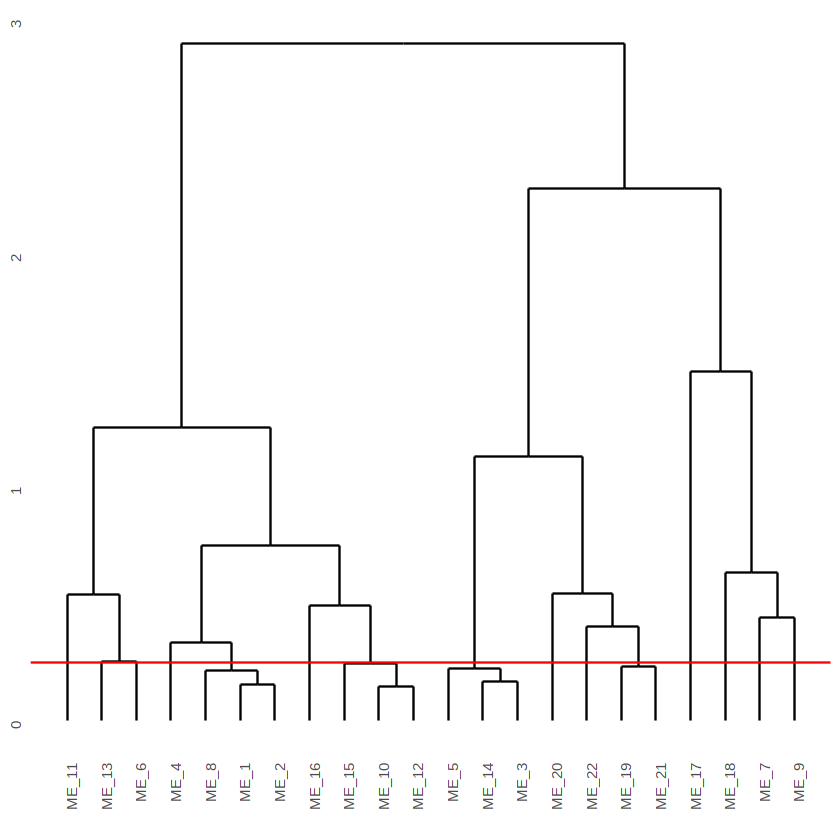

In [4]:
## Scale average expression & clustering
source("./heatmap.fun.R")
scale_avg <- avgs[mars, ,drop = FALSE] %>%
            as.matrix() %>%
            t() %>% scale() %>% t() %>%
            MinMax(., min = -1.5, max = 2.5)

mod_res <- get_modules(data = scale_avg, 
                       gene_use = NULL, 
                       minClusterSize = 10, 
                       tree.method = "ward.D2", 
                       sensitivity = 3, cor_method = "p", 
                       file_name = "Horizontal_mod_up")

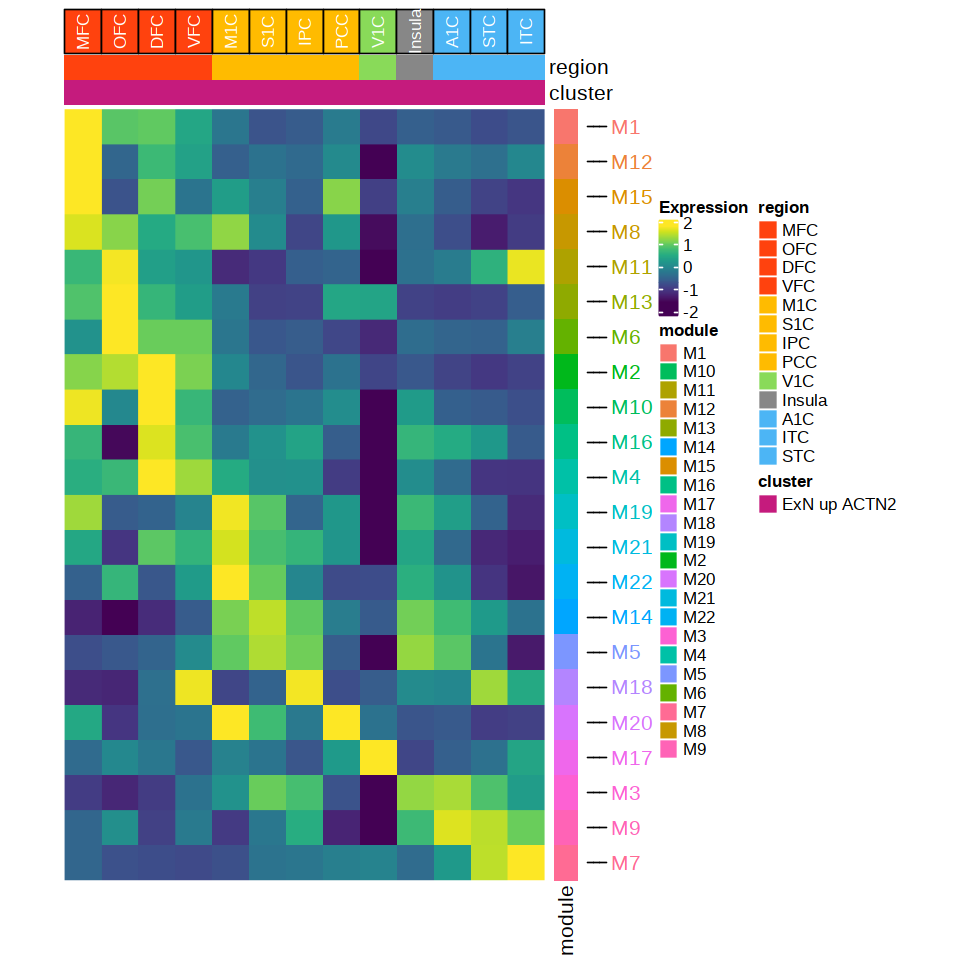

In [5]:
## Order modules based on module eigengenes
mes <- mod_res$mes %>%
            as.matrix() %>%
            MinMax(., min = -1.5, max = 1.75) ##5%, 95%
reg_ord <- c("MFC","OFC","DFC","VFC",
             "M1C","S1C","IPC","PCC",
             "V1C",
             "Insula",
             "A1C","STC","ITC")
mes <- mes[, paste0(reg_ord, "|ExN up ACTN2")]
mod_ord <- paste0("ME_", c(1, 12, 15, 8, 11, 13, 6, 2, 10, 16, 4, 
                           19, 21, 22, 14, 5, 18, 20, 
                           17,
                           3, 9, 7))
mes_vis <- mes[mod_ord, ]
rownames(mes_vis) <- gsub("E_", "", rownames(mes_vis))

ht_mes <- plot_heatmap.end(mat = mes_vis, label_genes = rownames(mes_vis), 
                 file_name = "Horizontal_mod_up_mes", 
                 color_breaks = seq(-1.5, 1.75, 0.25), 
                 module_labs = rownames(mes_vis))
options(repr.plot.width=8, repr.plot.height=8)
draw(ht_mes)

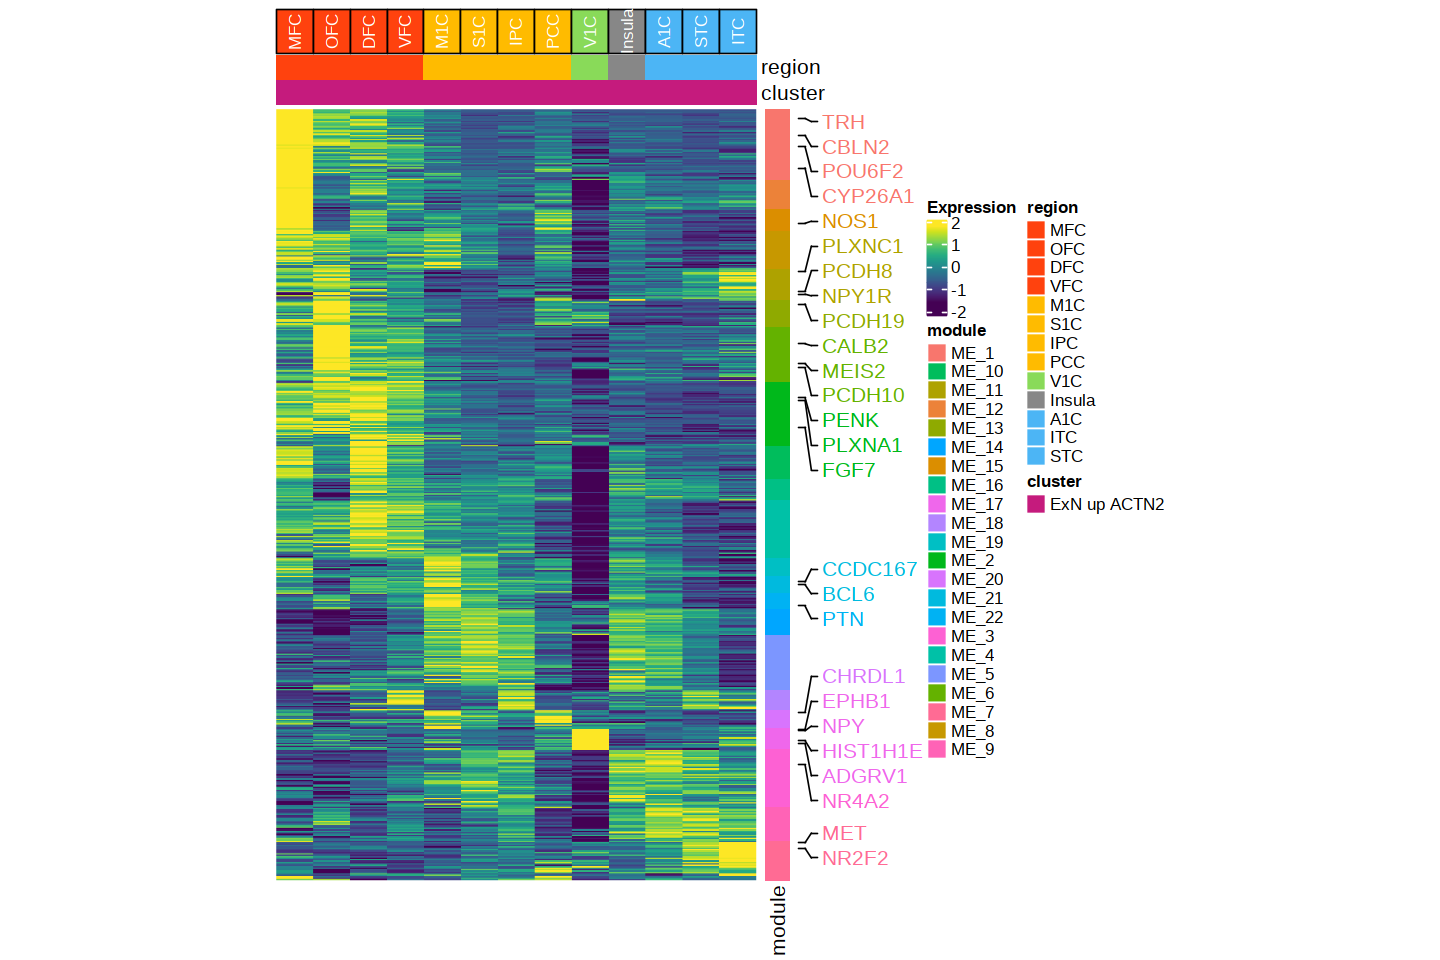

In [6]:
## Order genes based on module membership
vis_avg <- avgs[mars, ,drop = FALSE] %>%
            as.matrix() %>%
            t() %>% scale() %>% t() %>%
            MinMax(., min = -1.5, max = 2)
vis_avg <- vis_avg[, paste0(reg_ord, "|ExN up ACTN2")]

gene_ord <- lapply(mod_ord, function(mod) {
            sub_meta <- filter(mod_res$gene_meta, module == mod)
            mm <- setNames(sub_meta$mm, sub_meta$gene)
            names(mm)[order(mm, decreasing = TRUE)]
            }) %>%
            unlist() %>%
            unique()
sel_genes <- c("PLXNC1", "PCDH19", "PCDH8", "NPY1R", "CALB2", "MEIS2", 
               "PCDH10", "PLXNA1", "PENK", "FGF7", "TRH", "CHRDL1", 
               "NOS1", "POU6F2", "CBLN2", "CYP26A1", "CCDC167", "BCL6", 
               "PTN", "NR2F1", "NR4A2", "NR2F1", "NR2F2", "MET", "NPY", 
               "ADGRV1", "EPHB1", "HIST1H1E") %>% 
            unique()
ht_expr <- plot_heatmap.end(mat = vis_avg[gene_ord, ], 
                 label_genes = sel_genes, 
                 file_name = "Horizontal_mod_up_exp", 
                 color_breaks = seq(-1.5, 1.75, 0.25), 
                 module_labs = mod_res$gene_meta$module[match(gene_ord, mod_res$gene_meta$gene)])
options(repr.plot.width=12, repr.plot.height=8)
draw(ht_expr)

In [7]:
pdf("./report/genegradients_upper.v2.pdf", width = 12, height = 5)
ht_expr <- plot_heatmap.end(mat = vis_avg[gene_ord, ], 
                 label_genes = sel_genes, 
                 file_name = "Horizontal_mod_up_exp", 
                 color_breaks = seq(-1.5, 1.75, 0.25), 
                 module_labs = mod_res$gene_meta$module[match(gene_ord, mod_res$gene_meta$gene)])
draw(ht_expr)
dev.off()

png 
  2

In [8]:
## Save data
save(avgs, mod_ord, gene_ord, scale_avg, vis_avg, mod_res, 
     file = paste0("./load_files/", "Horizontal_mod_upper_res_v2.Rdata"))

In [9]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scatterpie_0.1.5      foreach_1.5.0         ggpubr_0.3.0         
 [4] ggplot2_3.3.0         GetoptLong_0.1.8      WGCNA_1.69           
 [7] fastcluster_1.1.25    dynamicTreeCut_1.63-1 viridis_0.5.1        
[10] viridisLite_0.3.0  